### Introduction to Linear Classification using Pseudo-Inverse and Lasso Regularization

#### Overview
In this Jupyter notebook, we will use linear classification to distinguish between two distinct classes: cats and dogs. The dataset comprises waveform representations of these animals.

**Mathematical Concepts**: 
   - The core mathematical operation here is the pseudo-inverse, particularly useful in scenarios where the feature matrix is not square or invertible. It computes the weights that minimize the least-squares error in the equation $ Ax = b $, where $ A $ is our feature matrix, $ x $ the weight vector, and $ b $ the label vector.
   - Classification is achieved by applying these weights to the test data and using the sign of the resulting product to determine the class label.
   
#### Objectives
1. **Linear Classification with Pseudo-Inverse**: Utilizing the pseudo-inverse method, we develop a linear model to classify the waveforms. This involves calculating a matrix of weights that best differentiates between cat and dog data in the training set, which is then applied to the test set.

3. **Lasso Regularization**: As an advanced feature selection technique, Lasso (Least Absolute Shrinkage and Selection Operator) regularization is applied to enhance our model. Lasso helps in identifying the most significant features while reducing overfitting, particularly beneficial in high-dimensional data.

6. **Comparative Analysis**: The notebook concludes with a comparative analysis of the classification results obtained from the pseudo-inverse method and the Lasso-regularized model.



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.linear_model import Lasso
import warnings # For Github share, hide local file paths
warnings.filterwarnings('ignore')

# Load data
cat_data = loadmat('../../data/catData_w.mat')['cat_wave'] 
dog_data = loadmat('../../data/dogData_w.mat')['dog_wave']

### Data Preparation and Initial Classification

#### Combining and Splitting Data:
- Combined cat and dog waveform data into a single dataset `CD`.
- Split this combined dataset into training (`train`) and testing (`test`) sets. The training set includes the first 60 samples of each class, and the testing set comprises the next 20 samples.
- Created a label vector `label` with `1` representing dogs and `-1` for cats, corresponding to the training samples.

#### Classification Using Pseudo-Inverse:
- Applied the pseudo-inverse method to the training data to compute a linear classifier. This involves calculating the matrix `A`, which represents the weights or coefficients that differentiate between cats and dogs.
- Used the classifier (`A`) on the test data to predict class labels. The `np.sign` function was applied to the results of `A @ test`, classifying each test sample as either cat or dog based on the sign of the calculated value.

This section establishes the foundational steps of our classification task, setting up the data and applying a linear classification model using the pseudo-inverse method.

In [3]:

# Combine and split data
CD = np.hstack((dog_data, cat_data))
train = np.hstack((dog_data[:, :60], cat_data[:, :60]))
test = np.hstack((dog_data[:, 60:80], cat_data[:, 60:80]))
label = np.hstack((np.ones(60), -1 * np.ones(60)))

# Classification using pseudo-inverse
A = label @ np.linalg.pinv(train)
test_labels = np.sign(A @ test)


### Visualization of Classification Results

#### Plotting Actual vs. Predicted Labels:
- Created `realtest_labels` to represent the actual labels of the test dataset (dogs as `1` and cats as `-1`).
- Plotted these actual labels alongside the predicted labels (`test_labels`) obtained from the classification model.

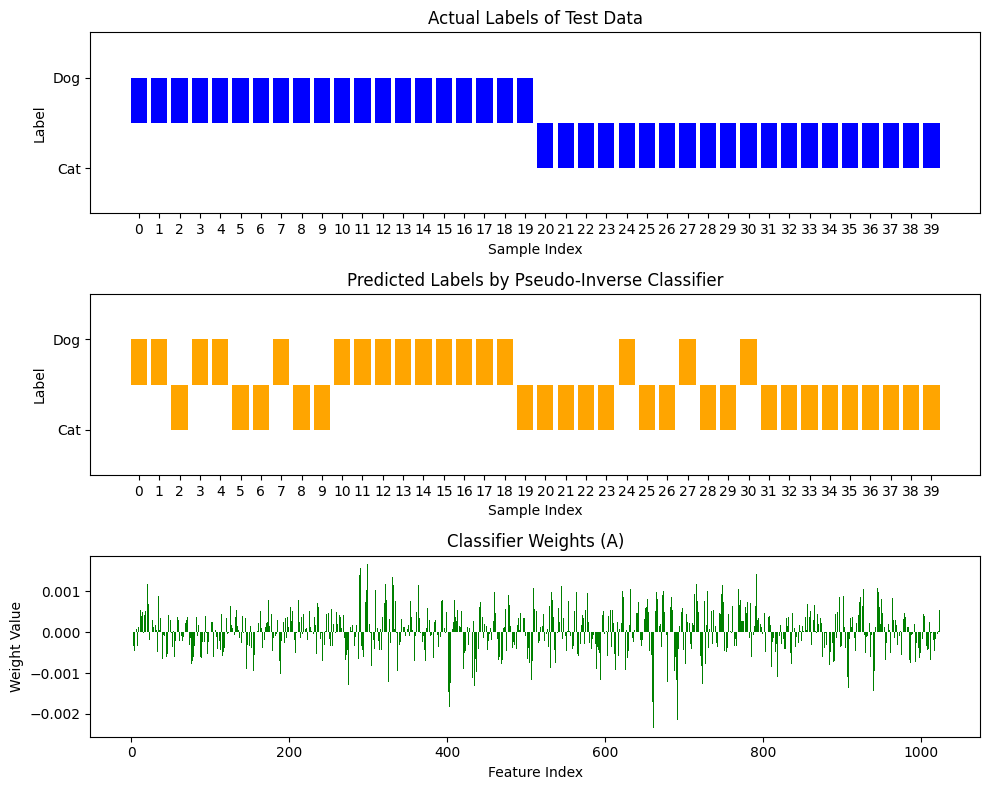

In [9]:

realtest_labels=np.hstack((np.ones(20), -1 * np.ones(20)))

# Plotting
plt.figure(1, figsize=(10, 8))

# Plot of Actual Test Labels
plt.subplot(3, 1, 1)
plt.bar(range(len(realtest_labels)), realtest_labels, color='blue')
plt.title("Actual Labels of Test Data")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.ylim([-2, 2])
plt.xticks(ticks=range(len(realtest_labels)))
plt.yticks(ticks=[-1, 1], labels=["Cat", "Dog"])

# Plot of Predicted Test Labels
plt.subplot(3, 1, 2)
plt.bar(range(len(test_labels)), test_labels, color='orange')
plt.title("Predicted Labels by Pseudo-Inverse Classifier")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.ylim([-2, 2])
plt.xticks(ticks=range(len(test_labels)))
plt.yticks(ticks=[-1, 1], labels=["Cat", "Dog"])

# Plot of Classifier Weights (A)
plt.subplot(3, 1, 3)
plt.bar(range(len(A)), A, color='green')
plt.title("Classifier Weights (A)")
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()


#### Explanation of Graphs:
- **First Graph**: Displays the actual class labels of the test data, where blue bars represent each sample's true class.
- **Second Graph**: Shows the predicted class labels from the classifier. The comparison between the first and second graphs visually demonstrates the classifier's performance.
- **Third Graph**: Visualizes the weights of the classifier (`A`). Each bar represents the weight assigned to a particular feature, indicating its influence on the classification decision.

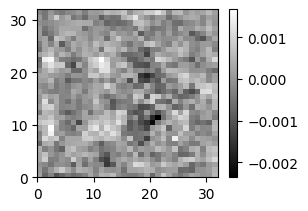

In [6]:
# Reshape and plot image
plt.figure(2)
plt.subplot(2, 2, 1)
# A2 = np.flipud(dog_data[:,6].reshape(32, 32).T)
A2 = np.flipud(A.reshape(32, 32))
plt.pcolor(A2)
plt.colorbar()
plt.set_cmap('gray')
plt.show()

The image above of A after reshaping it into a 32x32 matrix is a graphical representation of the learned weights. It provides a visual way to interpret which features are most significant in the classification model, although the specific insights depend on the nature and structure of your feature data.

### Applying Lasso Regularization for Feature Selection

#### Lasso Implementation:
- Implemented Lasso regression for feature selection using `sklearn.linear_model.Lasso`.
- Chose a regularization strength `alpha` of 0.005. This value penalizes the absolute size of the regression coefficients and helps in reducing overfitting by selecting only the most significant features.
- Fitted the Lasso model to the training data (`train.T`) with the corresponding labels (`label`), resulting in a new set of coefficients `A_lasso`.

#### Classification and Visualization:
- Classified the test data using the Lasso-derived coefficients: `test_labels_lasso = np.sign(A_lasso @ test)`.
- Plotted the predicted test labels and the Lasso coefficients for analysis.

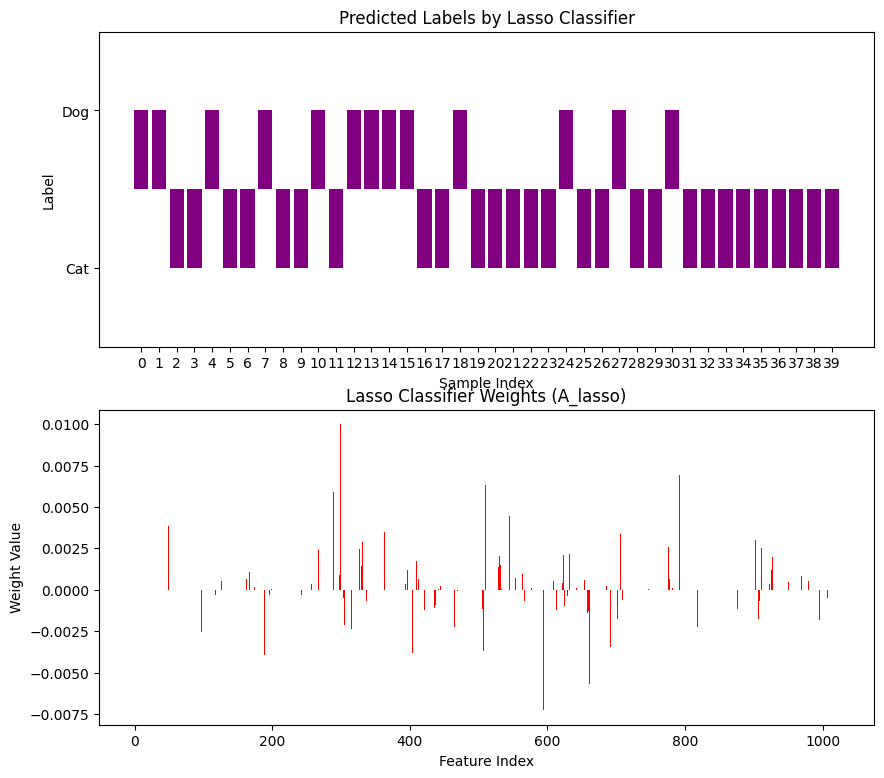

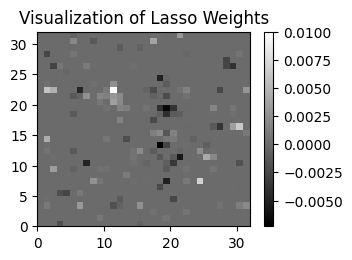

In [14]:

# Lasso for feature selection
lasso_model = Lasso(alpha=0.005)
A_lasso = lasso_model.fit(train.T, label).coef_

# Classification with lasso
test_labels_lasso = np.sign(A_lasso @ test)

plt.figure(1, figsize=(10, 9))

# Plot of Predicted Test Labels using Lasso
plt.subplot(2, 1, 1)
plt.bar(range(len(test_labels_lasso)), test_labels_lasso, color='purple')
plt.title("Predicted Labels by Lasso Classifier")
plt.xlabel("Sample Index")
plt.ylabel("Label")
plt.ylim([-2, 2])
plt.xticks(ticks=range(len(test_labels_lasso)))
plt.yticks(ticks=[-1, 1], labels=["Cat", "Dog"])

# Plot of Lasso Classifier Weights (A_lasso)
plt.subplot(2, 1, 2)
plt.bar(range(len(A_lasso)), A_lasso, color='red')
plt.title("Lasso Classifier Weights (A_lasso)")
plt.xlabel("Feature Index")
plt.ylabel("Weight Value")

# Visualization of Lasso Weights as Image
plt.figure(2)
plt.subplot(2, 2, 2)
A2_lasso = np.flipud(A_lasso.reshape(32, 32))
plt.pcolor(A2_lasso, cmap='gray')
plt.colorbar()
plt.title("Visualization of Lasso Weights")

plt.tight_layout()  # Adjusts layout to prevent overlap
plt.show()

